In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

path = 'data\\hidrologicos'
all_files = []

for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith(".csv"):
            all_files.append(os.path.join(root, file))
li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, sep=';',encoding = "utf-8")
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

Clean data

In [2]:
print(df.isna().sum())
print(df.value_counts)

#Excluindo colunas que tenham pelo menos 70% do dataset total preenchido com valores nulos
df = df.dropna(thresh=len(df)*0.5, axis=1)
df

id_subsistema                       0
nom_subsistema                      0
tip_reservatorio                    0
nom_bacia                           0
nom_ree                        948110
nom_reservatorio                    0
num_ordemcs                      6085
cod_usina                        3018
din_instante                        0
val_nivelmontante              237187
val_niveljusante               490950
val_volumeutilcon              808668
val_vazaoafluente              142116
val_vazaoturbinada             505396
val_vazaovertida               229262
val_vazaooutrasestruturas     1167079
val_vazaodefluente             157297
val_vazaotransferida          1014210
val_vazaonatural                37860
val_vazaoartificial           1297057
val_vazaoincremental           247087
val_vazaoevaporacaoliquida     611421
val_vazaousoconsuntivo         688030
id_reservatorio                     0
val_vazaoincrementalbruta     1368827
dtype: int64
<bound method DataFrame.value_counts 

,id_subsistema,nom_subsistema,tip_reservatorio,nom_bacia,nom_reservatorio,num_ordemcs,cod_usina,din_instante,val_nivelmontante,val_niveljusante,val_vazaoafluente,val_vazaoturbinada,val_vazaovertida,val_vazaodefluente,val_vazaonatural,val_vazaoincremental,val_vazaoevaporacaoliquida,val_vazaousoconsuntivo,id_reservatorio
0,NE,Nordeste,Fio dagua,JEQUITINHONHA,ITAPEBI,67.0,154.0,2000-01-01,NaN,NaN,NaN,NaN,NaN,NaN,350.720000,150.960000,NaN,NaN,JEUITP
1,NE,Nordeste,Reservatório com Usina,PARAGUACU,PEDRA DO CAVALO,104.0,189.0,2000-01-01,115.200000,NaN,421.870000,NaN,NaN,508.0,422.020000,422.020000,NaN,NaN,PGUCV
2,NE,Nordeste,Reservatório com Usina,PARNAIBA,BOA ESPERANÇA,105.0,190.0,2000-01-01,301.590000,259.570000,868.390000,417.0,0.0,417.0,814.640000,58.560000,NaN,NaN,PIBESP
3,NE,Nordeste,Reservatório com Usina,SAO FRANCISCO,SOBRADINHO,175.0,169.0,2000-01-01,384.420000,NaN,2810.000000,NaN,0.0,1615.0,3258.000000,2453.000000,NaN,NaN,SFSOBR
4,NE,Nordeste,Reservatório com Usina,SAO FRANCISCO,ITAPARICA,176.0,172.0,2000-01-01,301.130000,NaN,1820.460000,NaN,0.0,1670.0,3527.050000,321.940000,NaN,NaN,SFLGON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497546,S,Sul,FIO,URUGUAI,MONJOLINHO,172.0,94.0,2025-03-07,327.480011,264.630005,99.531998,64.0,0.0,64.0,10.438000,4.539000,-0.049,0.6614,RIUHMO
1497547,S,Sul,FIO,URUGUAI,FOZ CHAPECO,173.0,103.0,2025-03-07,264.380005,211.580002,721.143982,636.0,76.0,712.0,334.652008,68.974998,-0.903,5.7543,RIUHFC
1497548,S,Sul,RCU,URUGUAI,QUEBRA QUEIXO,174.0,95.0,2025-03-07,546.010010,426.329987,28.736000,51.0,0.0,52.0,30.548000,30.548000,0.084,0.1000,RIUQQX
1497549,S,Sul,FIO,URUGUAI,SAO JOSE,175.0,101.0,2025-03-07,154.240005,131.070007,33.323002,49.0,0.0,49.0,35.282001,35.282001,0.422,1.2086,RIUSJO


In [3]:
def analysis_by_reservatorio(reservatorio_name, data):
    reservatorio_df = data[data["nom_reservatorio"] == reservatorio_name]
    reservatorio_df = reservatorio_df.reset_index(drop=True)
    return reservatorio_df

def clean_df(df):
    # Removendo valores nulos
    df = df.dropna(axis=1, how="all")
    return df
    
reservatorios = df["nom_reservatorio"].unique()
print(f"Quantos reservatórios tem no dataset? \nR: {reservatorios.shape[0]}")
dfs = []

for res in reservatorios:
    df_res = analysis_by_reservatorio(res,df)
    df_res = clean_df(df_res)
    dfs.append(df_res)

Quantos reservatórios tem no dataset? 
R: 184


### Vazão natural
É a vazão que ocorreria em um rio sem a construção de barragens ou reservatórios hidrelétricos. É a vazão de um rio sem hidrelétricas, barragens ou algo que possa modificar o curso d'água
### Vazão incremental
É a vazão natural afluente do posto menos a vazão de cada posto a montante. É a vazão natural que chega de forma natural à usina hidrelétrica. É proveniente da área de contribuição da bacia hidrográfica a que pertence a usina 

In [4]:
def quarter(date_str):
    month = int(date_str[5:7])  # Extrai apenas o número do mês como inteiro
    
    if month in [1, 2, 3]:
        return '1_Quarter'
    elif month in [4, 5, 6]:
        return '2_Quarter'
    elif month in [7, 8, 9]:
        return '3_Quarter'
    elif month in [10, 11, 12]:
        return '4_Quarter'
    
for df in dfs:
    df['quarter'] = df['din_instante'].apply(lambda x : quarter(x))

In [5]:
quarter_counts = dfs[0]['quarter'].value_counts().sort_index()
quarter_counts

quarter
1_Quarter    2323
2_Quarter    2275
3_Quarter    2300
4_Quarter    2300
Name: count, dtype: int64

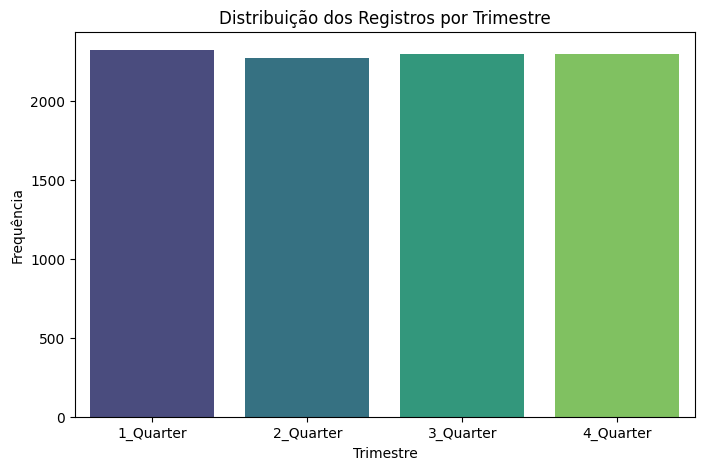

In [6]:
plt.figure(figsize=(8, 5))
sns.barplot(x=quarter_counts.index, y=quarter_counts.values, palette="viridis")

# Adicionar rótulos e título
plt.xlabel("Trimestre")
plt.ylabel("Frequência")
plt.title("Distribuição dos Registros por Trimestre")

# Mostrar o gráfico
plt.show()

In [87]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

adf_test(list(aux[:]))

ModuleNotFoundError: No module named 'statsmodels'

Criando LSTM

In [ ]:
import torch
import torch.nn as nn

class LSTMPredictor(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMPredictor, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)  # Controls how many steps ahead

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        return self.fc(lstm_out[:, -1, :])  # Take last time step

# Example: output_size = 1 → predict 1 step ahead
# Example: output_size = 10 → predict next 10 time steps
model = LSTMPredictor(input_size=1, hidden_size=50, num_layers=2, output_size=10)